## PHẦN 1: PHÂN TÍCH DỮ LIỆU

### Tổng quan về bộ dữ liệu

Bộ dữ liệu này cung cấp thông tin về Ước lượng số thương vong thực tế vượt qua so với số lượng người chết do covid-19 được chính phủ ghi nhận trên toàn cầu hàng được cập nhật hàng ngày. 

Theo lời tác giả trong bài báo Coronavirus excess deaths tracker (https://www.economist.com/graphic-detail/coronavirus-excess-deaths-tracker), khi dịch bùng phát mọi người đã quen với số thương vong được chính phủ công bố hàng ngày tuy nhiên số thương vong thực tế có thể cao hơn con số này rất nhiều và nó khiến số liệu tử vong trở nên phức tạp. Nhiều quốc gia không tính những người chết không xác nhận dương tính, quy trình xử lý chứng tử có thể kéo dài, và đại dịch gây khó khăn trong điều trị bệnh khác, có thể dẫn đến tăng tử vong từ các nguyên nhân khác ngoài Covid-19.

GitHub: https://github.com/TheEconomistcovid-19-the-economist-global-excess-deaths-model

### Cấu trúc thư mục của bộ dữ liệu
Bộ dữ liệu được cấu trúc theo một dạng R project có thể mở được bằng R studio

covid-19-the-economist-global-excess-deaths-model-main/

├── github/

├── output-data/

├── plots/

├── scripts/

├── source-data/

├── package.json

└── README.md

output-data là số liệu ước lượng tử vong được tác giả tính toán

plots là biểu đồ số giá trị thiếu

scripts là các đoạn code được viết bằng R để ước lượng tử vong

source-data là các nguồn dữ liệu gốc bao gồm các dữ liệu động và dữ liệu tĩnh

### Mô tả đặc điểm bộ dữ liệu dựa trên EDA


INPUT: thông tin về các quốc gia trên thế giới bao gồm mã quốc gia, độ tuổi trung bình, nhiệt độ trong thành phố, thu nhập, số người tử vong do covid thực tế,.... được lưu trong folder source-data/

OUTPUT: ước lượng số lượng thương vong thực tế 

Trong bộ dữ liệu tác giả đã gộp các file đầu vào thành file output-data\country_daily_excess_deaths_with_covariates.RDS dựa theo đoạn script: scripts\1_excess_deaths_global_estimates_data_generation.R

In [30]:
import pandas as pd
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Extract RDS file from output-data\country_daily_excess_deaths_with_covariates.RDS
result = pyreadr.read_r('D:\Covid19 Global Excess Deaths\covid-19-the-economist-global-excess-deaths-model-main\output-data\country_daily_excess_deaths_with_covariates.RDS') 
df = result[None] # extract the pandas data frame 

In [4]:
df.head()

,iso3c,date,region,subregion,population,hospital_beds_per_thousand,population_density,median_age,aged_65_older,aged_70_older,...,vaccinated_pct_intp,fully_vaccinated_pct_intp,cumulative_daily_vaccinations_per_100k_intp,vaccinated_pct_lagged_two_weeks_intp,fully_vaccinated_pct_lagged_two_weeks_intp,cumulative_daily_vaccinations_per_100k_lagged_two_weeks_intp,vaccinated_pct_over_pop_65_intp,fully_vaccinated_pct_over_pop_65_intp,gdpppc_ppp_imf,temporal_recency
0,ABW,2022-03-11,Latin America & Caribbean,Latin America and the Caribbean,106459.0,NaN,584.8,41.2,13.085,7.452,...,82.300000,75.795000,137369.315887,82.09,75.57,136958.829221,1.352694,1.849828,37150.92,-617.0
1,ABW,2023-03-27,Latin America & Caribbean,Latin America and the Caribbean,106459.0,NaN,584.8,41.2,13.085,7.452,...,84.870000,79.070000,143342.507444,84.83,79.05,143280.511746,1.156286,1.599541,37150.92,-236.0
2,ABW,2022-07-28,Latin America & Caribbean,Latin America and the Caribbean,106459.0,NaN,584.8,41.2,13.085,7.452,...,84.030000,78.150000,141525.845631,83.93,78.02,141260.954922,1.220481,1.669851,37150.92,-478.0
3,ABW,2022-09-03,Latin America & Caribbean,Latin America and the Caribbean,106459.0,NaN,584.8,41.2,13.085,7.452,...,84.243333,78.403333,142028.386515,84.20,78.31,141900.637804,1.204178,1.650490,37150.92,-441.0
4,ABW,2023-02-12,Latin America & Caribbean,Latin America and the Caribbean,106459.0,NaN,584.8,41.2,13.085,7.452,...,84.776667,78.986667,143166.852967,84.75,78.96,143113.311228,1.163419,1.605910,37150.92,-279.0


In [4]:
#Quick view of the data
print('\n____________ Dataset info ____________')
print(df.info())
print('\n____________ Statistics of numeric features ____________')
print(df.describe())
print('\n____________ Check for null data ____________')
print(df.isnull().sum())


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348230 entries, 0 to 348229
Columns: 162 entries, iso3c to temporal_recency
dtypes: bool(2), float64(144), int32(1), object(15)
memory usage: 424.4+ MB
None

____________ Statistics of numeric features ____________
         population  hospital_beds_per_thousand  population_density  \
count  3.482300e+05               256060.000000        315616.00000   
mean   3.420794e+07                    2.992263           702.50401   
std    1.337873e+08                    2.548277          3005.89008   
min    4.700000e+01                    0.100000             0.13700   
25%    4.490020e+05                    1.200000            41.28500   
50%    5.637022e+06                    2.300000            98.56700   
75%    2.389340e+07                    4.000000           237.01600   
max    1.425887e+09                   13.800000         22000.00000   

          median_age  aged_65_older  aged_70_older  lif


____________ Dataset correlation and heatmap ____________


<Axes: >

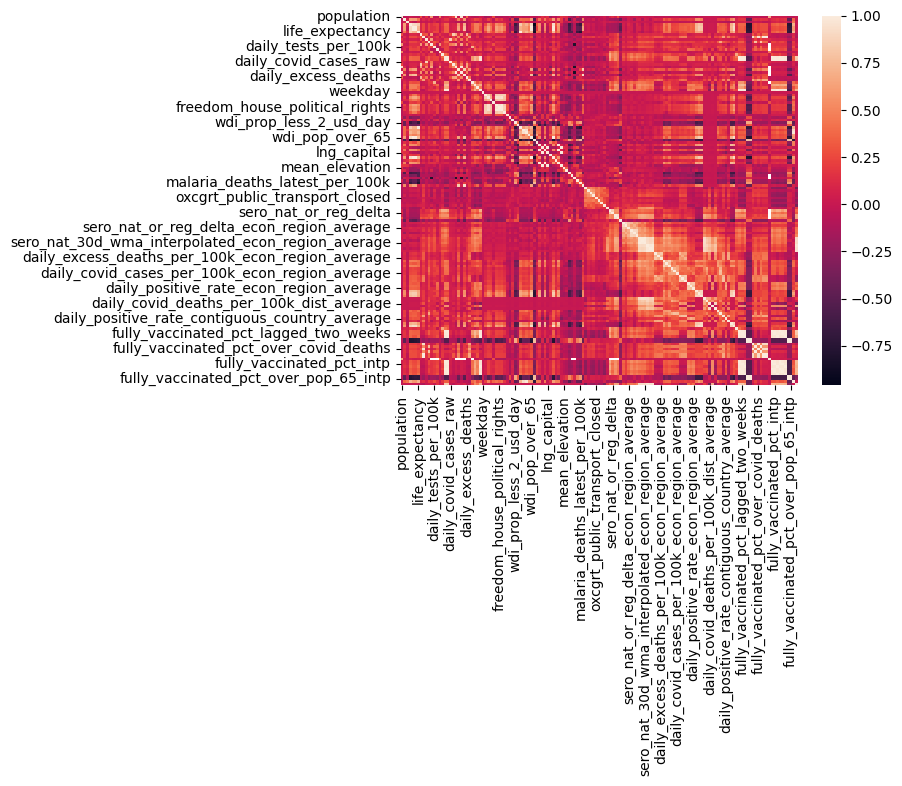

In [25]:
#Thể hiện mối tương quan giữa các numeric feature 
print('\n____________ Dataset correlation and heatmap ____________')
df.corr(numeric_only= True)
#If you want to see the correlation matrix uncomment code below
#print(df.corr(numeric_only= True)) 

sns.heatmap(df.corr(numeric_only= True))

Thể hiện mối tương quan giữa hai feature cụ thể

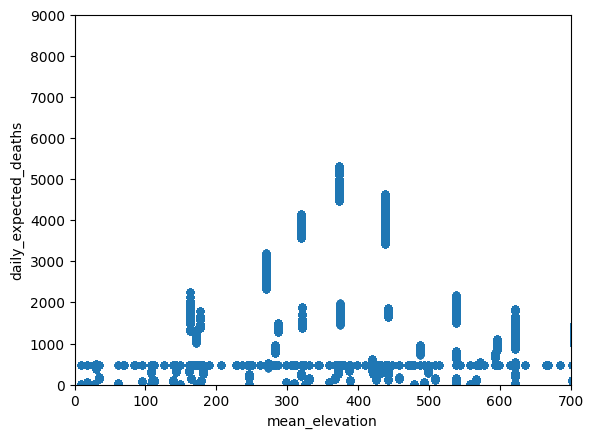

In [33]:
df.plot(kind="scatter", y="daily_expected_deaths", x="mean_elevation")
plt.axis([0, 0.7*10**3, 0, 0.9*10**4])

plt.show()

Thể hiện phân bố giá trị của một feature


____________ Box plot of some data ____________


<Axes: >

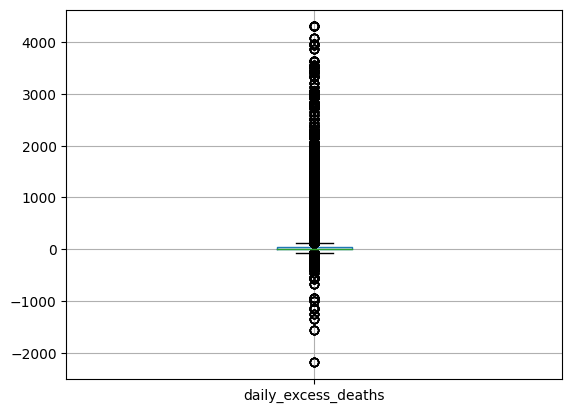

In [7]:

print('\n____________ Box plot of some data ____________')
df[['daily_excess_deaths']].boxplot()
# df[['population']].boxplot()


### Kết luận 

Bộ dữ liệu lớn với nhiều features (162 cột) với 348230 entries

Các dữ liệu chia thành 4 kiểu dữ liệu chính: bool(2), float64(144), int32(1), object(15) và 

Bộ dữ liệu có rất nhiều giá trị rỗng (NaN) trong đó feature fully_vaccinated_pct_over_pop_65_intp đến 124099 NaN


### Phương án xử lý giá trị rỗng (NaN)
Theo đánh giá cá nhân và các kết luận của tác giả trong bài báo, ta có thể xếp bộ dữ liệu vào loại MNAR (Missing not at random) trong ba loại MCAR, MAR và MNAR vì các dữ liệu này thuộc về một quốc gia, một số dữ liệu khó có thể thu thập hoàn toàn

Ta có thể thấy một trong ví dụ của tác giả Turkmenistan and Triều Tiên là hai nước không công khai số ca tử vong do covid 19, vậy ta có thể kết luận việc giá trị rỗng trong bộ dữ liệu PHẦN LỚN là do các yếu tố bên ngoài tác động.

Để lựa chọn phương án, ta cần dựa vào đặc điểm chính bộ dữ liệu:
- Có rất nhiều giá trị rỗng (khó áp dụng được phương pháp loại bỏ hàng hay cột chứa rỗng)
- Là loại MNAR (giá trị rỗng do yếu tố ngoài) nên khó đoán được giá trị thực cũng như tự điền giá trị thiếu
#### Phương án 1: Nội suy từ điểm dữ liệu có sẵn
Nội suy (interpolation) sẽ lấy các giá trị có sẵn gần giá trị thiếu trong dataframe và nội suy ra những giá trị còn thiếu

Phương pháp nội suy sẽ tạo ra các điểm dữ liệu mới dựa trên tập điểm đã biết, một phương pháp cho kết quả khá tốt khi điền dữ liệu thiếu.

Tuy nhiên phương pháp này cần nhiều thời gian với dữ liệu nhiều feature và nhiều kiểu dữ liệu, do không có nhiều thời gian nên em chưa thể viết hàm nội suy cho các feature cụ thể mà chỉ có thể dùng hàm nội suy có sẵn của pandas, do đó hàm nội suy này cho ra kết quả không tốt và còn nhiều giá trị rỗng

In [11]:
inter_df = df.copy()
inter_df.interpolate(method ='linear', limit_direction ='backward', inplace=True)
print('\n____________ Check for null data ____________')
print(inter_df.isnull().sum())
print('\n____________ Daily excess deaths ____________')
print(inter_df.daily_excess_deaths.isnull().sum())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7596\1110033903.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inter_df.interpolate(method ='linear', limit_direction ='backward', inplace=True)



____________ Check for null data ____________
iso3c                                                              0
date                                                               0
region                                                          5672
subregion                                                          0
population                                                         0
                                                                ... 
cumulative_daily_vaccinations_per_100k_lagged_two_weeks_intp       0
vaccinated_pct_over_pop_65_intp                                    0
fully_vaccinated_pct_over_pop_65_intp                              0
gdpppc_ppp_imf                                                     0
temporal_recency                                                   0
Length: 162, dtype: int64

____________ Daily excess deaths ____________
2836



#### Phương án 2: Lấy trung bình theo khu vực phụ (sub-region)
Phương án đầu tiên là điền vào các phần thiếu bằng giá trị trung bình. Tuy nhiên vấn đề ở đây là do sự khác nhau lớn ở các nước phát triển và các nước kém phát triển (ví dụ như Mĩ và Nam Phi), sự khác nhau thể hiện ở các đặc điểm dịch vụ y tế, số vaccin hay độ tuổi trung bình,...

Vậy ta sẽ giả sử mỗi khu vực có một mức phát triển gần như tương đương nhau, ta sẽ tính trung bình mỗi khu vực rồi điền vào giá trị thiếu của quốc gia trong đó

In [12]:
#Fill data with mean value of sub region
# mean_value = df.loc[df['subregion']=="Latin America and the Caribbean"].mean()
mean_df = df.copy()

subregions = mean_df['subregion'].unique()
for region in subregions:
    # mean_df.fillna(mean_df.loc[mean_df.subregion==region].mean(numeric_only=True), inplace=True)
    mean_df.loc[mean_df.subregion==region].fillna(mean_df.loc[mean_df.subregion==region].mean(numeric_only=True), inplace=True)
print('\n____________ Check for null data ____________')
print(mean_df.isnull().sum())



____________ Check for null data ____________
iso3c                                                              0
date                                                               0
region                                                          5672
subregion                                                          0
population                                                         0
                                                                ... 
cumulative_daily_vaccinations_per_100k_lagged_two_weeks_intp       0
vaccinated_pct_over_pop_65_intp                                    0
fully_vaccinated_pct_over_pop_65_intp                              0
gdpppc_ppp_imf                                                     0
temporal_recency                                                   0
Length: 162, dtype: int64


Nhận xét: 
- Chỉ còn feature region là còn giá trị rỗng tuy nhiên ta có thể loại bỏ đặc điểm này và thay bằng subregion
- Kết quả của phương án 2 tốt hơn do đa phần giá trị rỗng bị loại bỏ, tuy có thể không phải là phương án tối ưu nhưng là phương án phù hợp với thời gian cũng như bộ dữ liệu.

### PHẦN 2: MÔ HÌNH HÓA VÀ XỬ LÝ DỮ LIỆU

#### Lựa chọn mô hình học máy (machine learning model)
Mô hình học máy em đề xuất cho bài toán này là Model Xgboost, mô hình được lựa chọn phù hợp với đặc tính nêu trên của bộ dữ liệu ngoài ra nó còn có nhiều ưu điểm ở các khía cạnh traning như:

- XGBoost (extreme Gradient Boosting) là phiên bản cải tiến của Gradient Boosting
- XGBoost áp dụng cơ chế Regularization nên hạn chế đáng kể hiệ tượng Overfitting (GBM không có regularization).
- XGboost cho phép người dùng sử dụng hàm tối ưu và chỉ tiêu đánh giá của riêng họ, không hạn chế ở những hàm cung cấp sẵn.
- Tính năng tree pruning hộ trợ việc tự động bỏ qua những leaves, nodes không mang giá trị tích cực trong quá trình mở rộng tree.

Tuy nhiên, còn nhiều mô hình có thể áp dụng cho bộ dữ liệu này nhưng do thời gian có hạn, em không thể test hết và chỉ lựa một mô hình mà em thấy khả thi nhất.

### Tiền xử lý dữ liệu
Phương án tiền xử lý dữ liệu được chia thành 2 bước

- B1: Loại bỏ cột không quan trọng, chuyển đổi kiểu dữ liệu chuỗi thành category, so sánh
- B2: Chia tập dữ liệu và sampling bằng phương pháp Satrisfied sampling trích trong sách (Geron, 2019) trang 56 

Satrified sampling: nhằm cân bằng data tránh mất dữ liệu quan trọng 

In [94]:
df = mean_df.copy()

In [95]:
#Drop region column
df.drop(["region"],axis=1, inplace=True)
# Extract text features
cats = df.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   df[col] = df[col].astype('category')

In [96]:
#Stratified sampling, to remain distributions of important features, see (Geron, 2019) page 56
    
df["Interval"] = pd.cut(df["daily_excess_deaths"],
                                bins=[-3000,-1000, 0, 1000, 3000, np.inf],
                                labels=[1,2,3,4,5]) # use numeric labels to plot histogram

# Create training and test set
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45) # n_splits: no. of re-shuffling & splitting = no. of train-test sets 
                                                                            # (if you want to run the algorithm n_splits times with different train-test set)
for train_index, val_index in splitter.split(df, df["Interval"]): # Feature "Interval charge" must NOT contain NaN
    train_set = df.iloc[train_index]
    val_set = df.iloc[val_index]              
for train_index, test_index in splitter.split(train_set, train_set["Interval"]): # Feature "Interval charge" must NOT contain NaN
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]              


train_set.drop(["Interval"],axis=1, inplace=True)
val_set.drop(["Interval"],axis=1, inplace=True)
test_set.drop(["Interval"],axis=1, inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7596\311672673.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(["Interval"],axis=1, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7596\311672673.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set.drop(["Interval"],axis=1, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7596\311672673.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set

### Huấn luyện mô hình và tối ưu hóa thông số.

Chia dữ liệu và label

In [97]:

train_set_labels = train_set["daily_excess_deaths"].copy()
train_set = train_set.drop(columns = "daily_excess_deaths")

val_set_labels = val_set["daily_excess_deaths"].copy()
val_set = val_set.drop(columns = "daily_excess_deaths")

test_set_labels = test_set["daily_excess_deaths"].copy()
test_set = test_set.drop(columns = "daily_excess_deaths")

XGBoost đi kèm với một lớp riêng để lưu trữ bộ dữ liệu được gọi là DMatrix. Đây là một lớp được tối ưu hóa cao về bộ nhớ và tốc độ. Đó là lý do tại sao việc chuyển đổi bộ dữ liệu thành định dạng này là một yêu cầu của XGBoost:

In [98]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(train_set, train_set_labels, enable_categorical=True)
dval_reg = xgb.DMatrix(val_set, val_set_labels, enable_categorical=True)
dtest_reg = xgb.DMatrix(test_set, test_set_labels, enable_categorical=True)

### Thiết lập parameter

- num_boost_round: XGBoost giảm thiểu hàm mất mát RMSE trong các vòng nhỏ tăng dần. Tham số này xác định số lượng của những vòng đó
- evals: tham số xác định tập validation 
- verbose_eval = kiểm tra hiệu suất của mô hình sau mỗi x vòng
- tree_method: hist
- early_stop: XGBoost theo dõi rsme trên tập validation, và nếu nó không cải thiện trong một số vòng đã chỉ định, nó tự động dừng quá trình huấn luyện.

In [99]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
num_boost_round=100

evals = [(dtrain_reg, "train"), (dval_reg, "validation")]
verbose_eval = 10
early_stop = 50

### Training 

In [103]:
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=num_boost_round,
   evals=evals,
   verbose_eval=verbose_eval,
   early_stopping_rounds=early_stop
)

[0]	train-rmse:126.92639	validation-rmse:133.16607
[10]	train-rmse:9.39822	validation-rmse:60.49339
[20]	train-rmse:5.01188	validation-rmse:60.77291
[30]	train-rmse:3.89706	validation-rmse:61.54447
[40]	train-rmse:2.96240	validation-rmse:62.33816
[50]	train-rmse:2.43637	validation-rmse:62.87677
[60]	train-rmse:2.06341	validation-rmse:63.07550
[62]	train-rmse:2.00344	validation-rmse:63.09753


#### Dự đoán trên tập dữ liệu mà model chưa từng thấy

In [105]:
preds = model.predict(dtest_reg)

In [106]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test_set_labels, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 63.098


##### Đánh giá sơ bộ: ta thấy giá trị của label trải dài từ -2000 đến hơn 4000 nhưng phương sai (RSME) của model khá nhỏ, chỉ khoảng 63.098
==> Model đáng tin cậy

### PHẦN 3: ĐÁNH GIÁ MÔ HÌNH (EVALUATION)

### Phương án cross_validation và chỉ số phương sai (rsme)
Cross-validation là một phương pháp tái lấy mẫu sử dụng các phần khác nhau của dữ liệu để kiểm thử và huấn luyện một mô hình trong các lần lặp khác nhau. Nó chủ yếu được sử dụng trong các tình huống mục tiêu là dự đoán, khi muốn ước lượng mức độ chính xác mà một mô hình dự đoán sẽ thực hiện trong thực tế.

In [71]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 100

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)

In [72]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,131.637932,1.001515,136.886983,5.336370
1,95.791758,0.635932,104.160143,3.540895
2,69.881734,0.538318,80.814109,2.882252
3,51.473114,0.381344,65.388198,2.867318
4,38.543298,0.442196,55.107821,2.631708


In [108]:
best_rmse = results['test-rmse-mean'].min()
print(best_rmse)

32.8586620321397


## TỔNG KẾT

Phương pháp cross validation cho ra hệ số rmse nhỏ nhất là 32.85 (số rsme càng nhỏ so với các giá trị trải dài mô hình càng tốt), vì vậy với phương pháp XGboost được đề xuất cho một model đáng tin cậy
